# Build a recommender system by using cosine simillarties score

## Attaching Resources

### Importing Necessary Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from sklearn.metrics import pairwise_distances

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [16]:
bk = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_10_Recommendation%20system/Dataset/book.csv', encoding = 'Latin1')
bk.drop(columns = 'Unnamed: 0', inplace = True)

bk

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [17]:
bk.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [18]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [19]:
bk.isna().sum()

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [20]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [21]:
uni(bk)


 All Unique Value in User.ID
[     8      9     10 ... 278851 278852 278854]
Total no of unique values 2182

 All Unique Value in Book.Title
[' Jason, Madison &amp' ' Other Stories;Merril;1985;McClelland &amp'
 ' Repairing PC Drives &amp' ... 'iI Paradiso Degli Orchi' 'stardust'
 'Ã?Â?bermorgen.']
Total no of unique values 9659

 All Unique Value in Book.Rating
[ 1  2  3  4  5  6  7  8  9 10]
Total no of unique values 10


### Checking for Duplicated Values

In [25]:
bk[bk.duplicated()]

,User.ID,Book.Title,Book.Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [26]:
bk.drop_duplicates(inplace = True)

In [27]:
bk[bk.duplicated()]

,User.ID,Book.Title,Book.Rating


- There is no duplicate vale in are dataset

### Visualizing The Data

In [54]:
count = bk['Book.Title'].value_counts()
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'Book','Book.Title': 'Count'})
count = count.head(10)

#### Ploting Countplot

Text(0.5, 1.0, '10 Best-selling books')

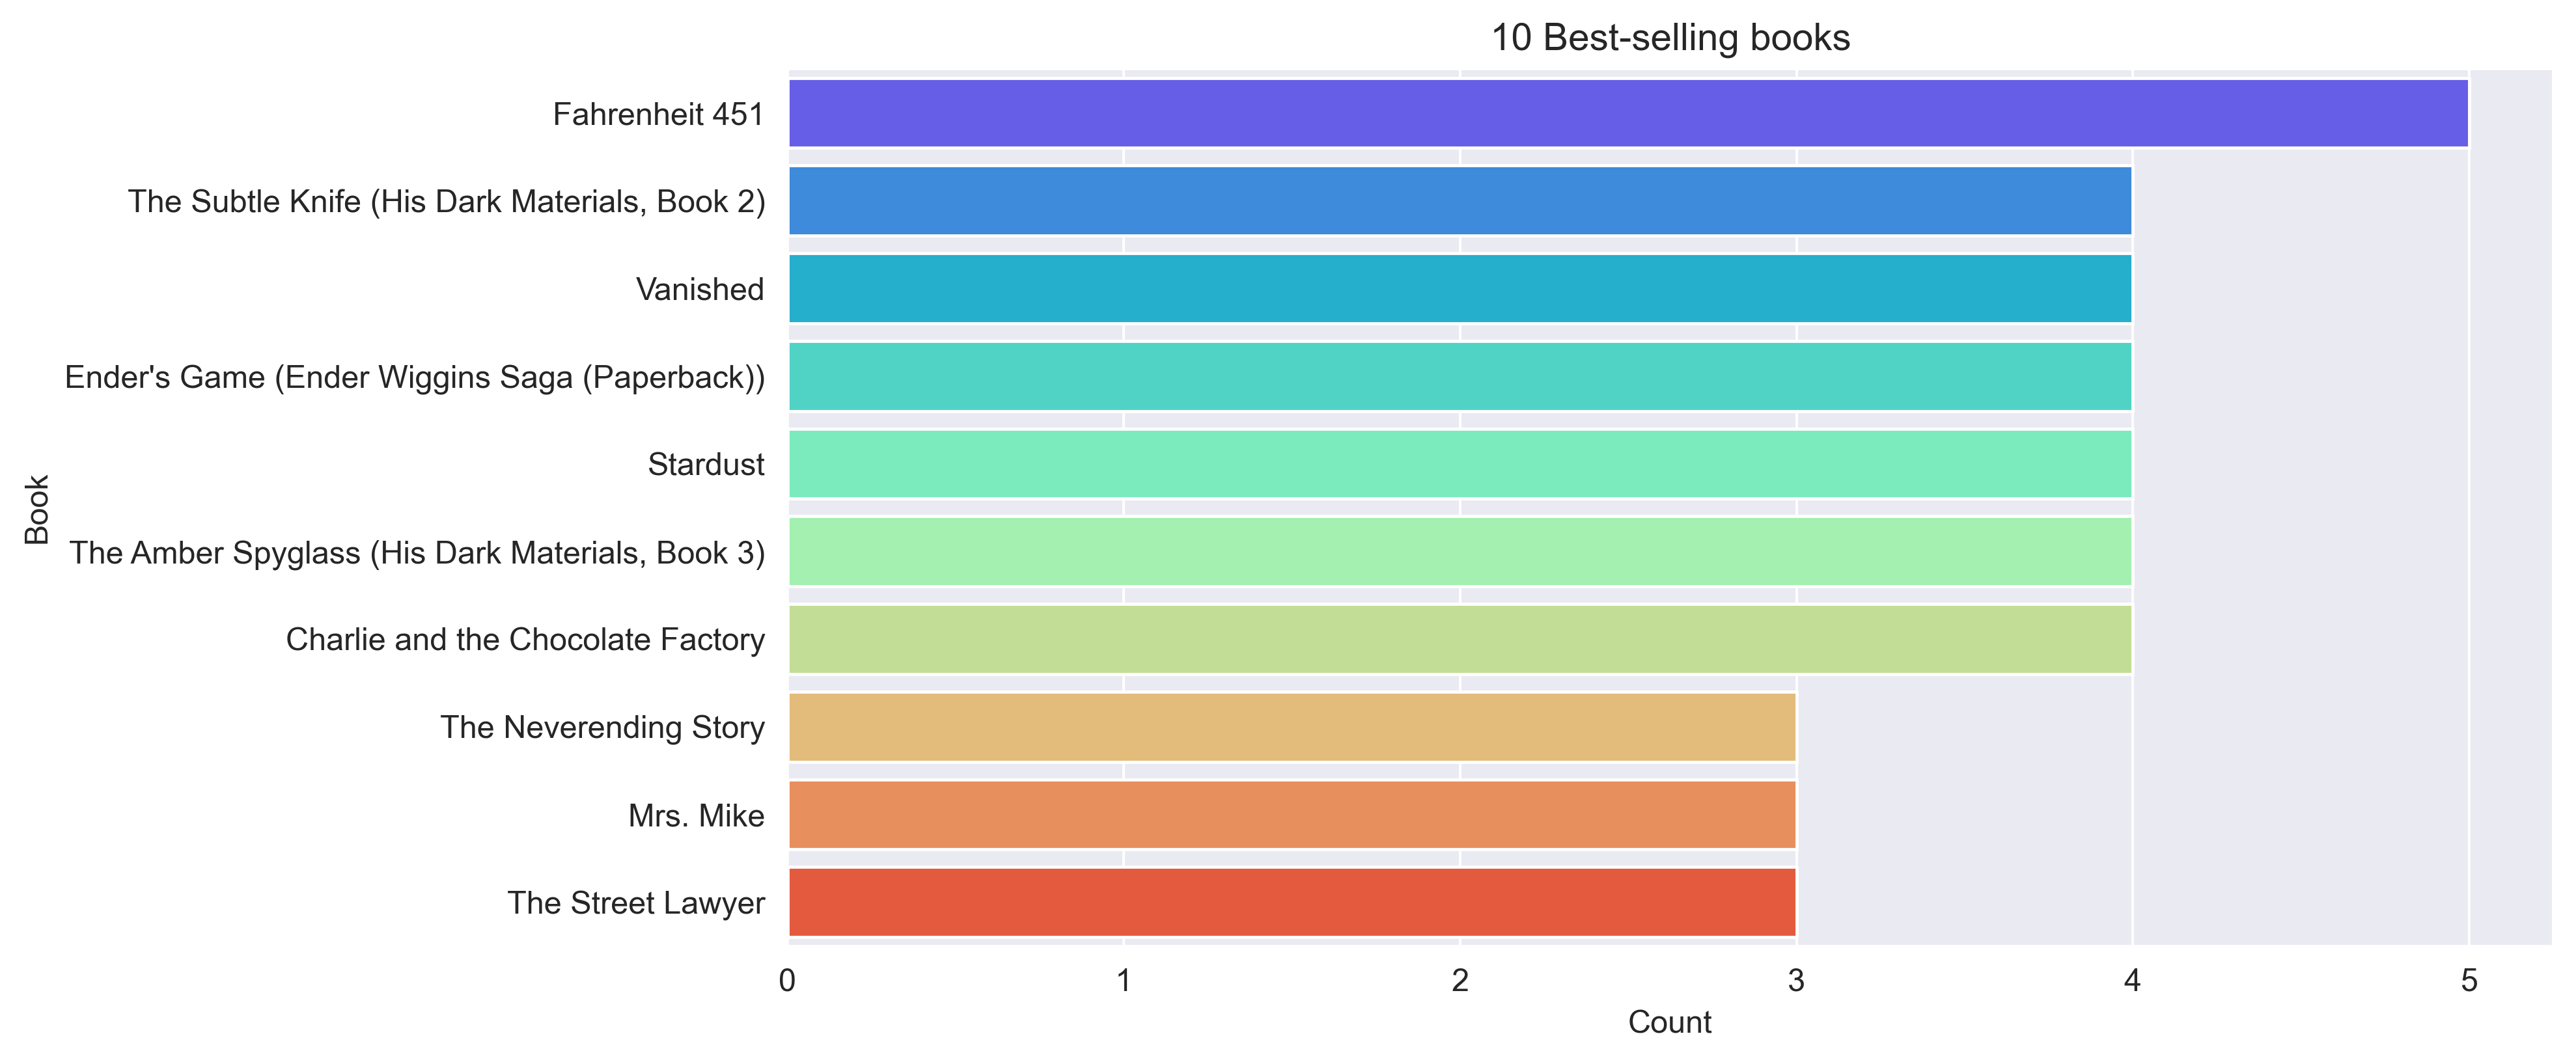

In [63]:
sns.barplot(x = 'Count', y = 'Book', data = count, palette = 'rainbow')
plt.title('10 Best-selling books')

<AxesSubplot:xlabel='Book.Rating', ylabel='count'>

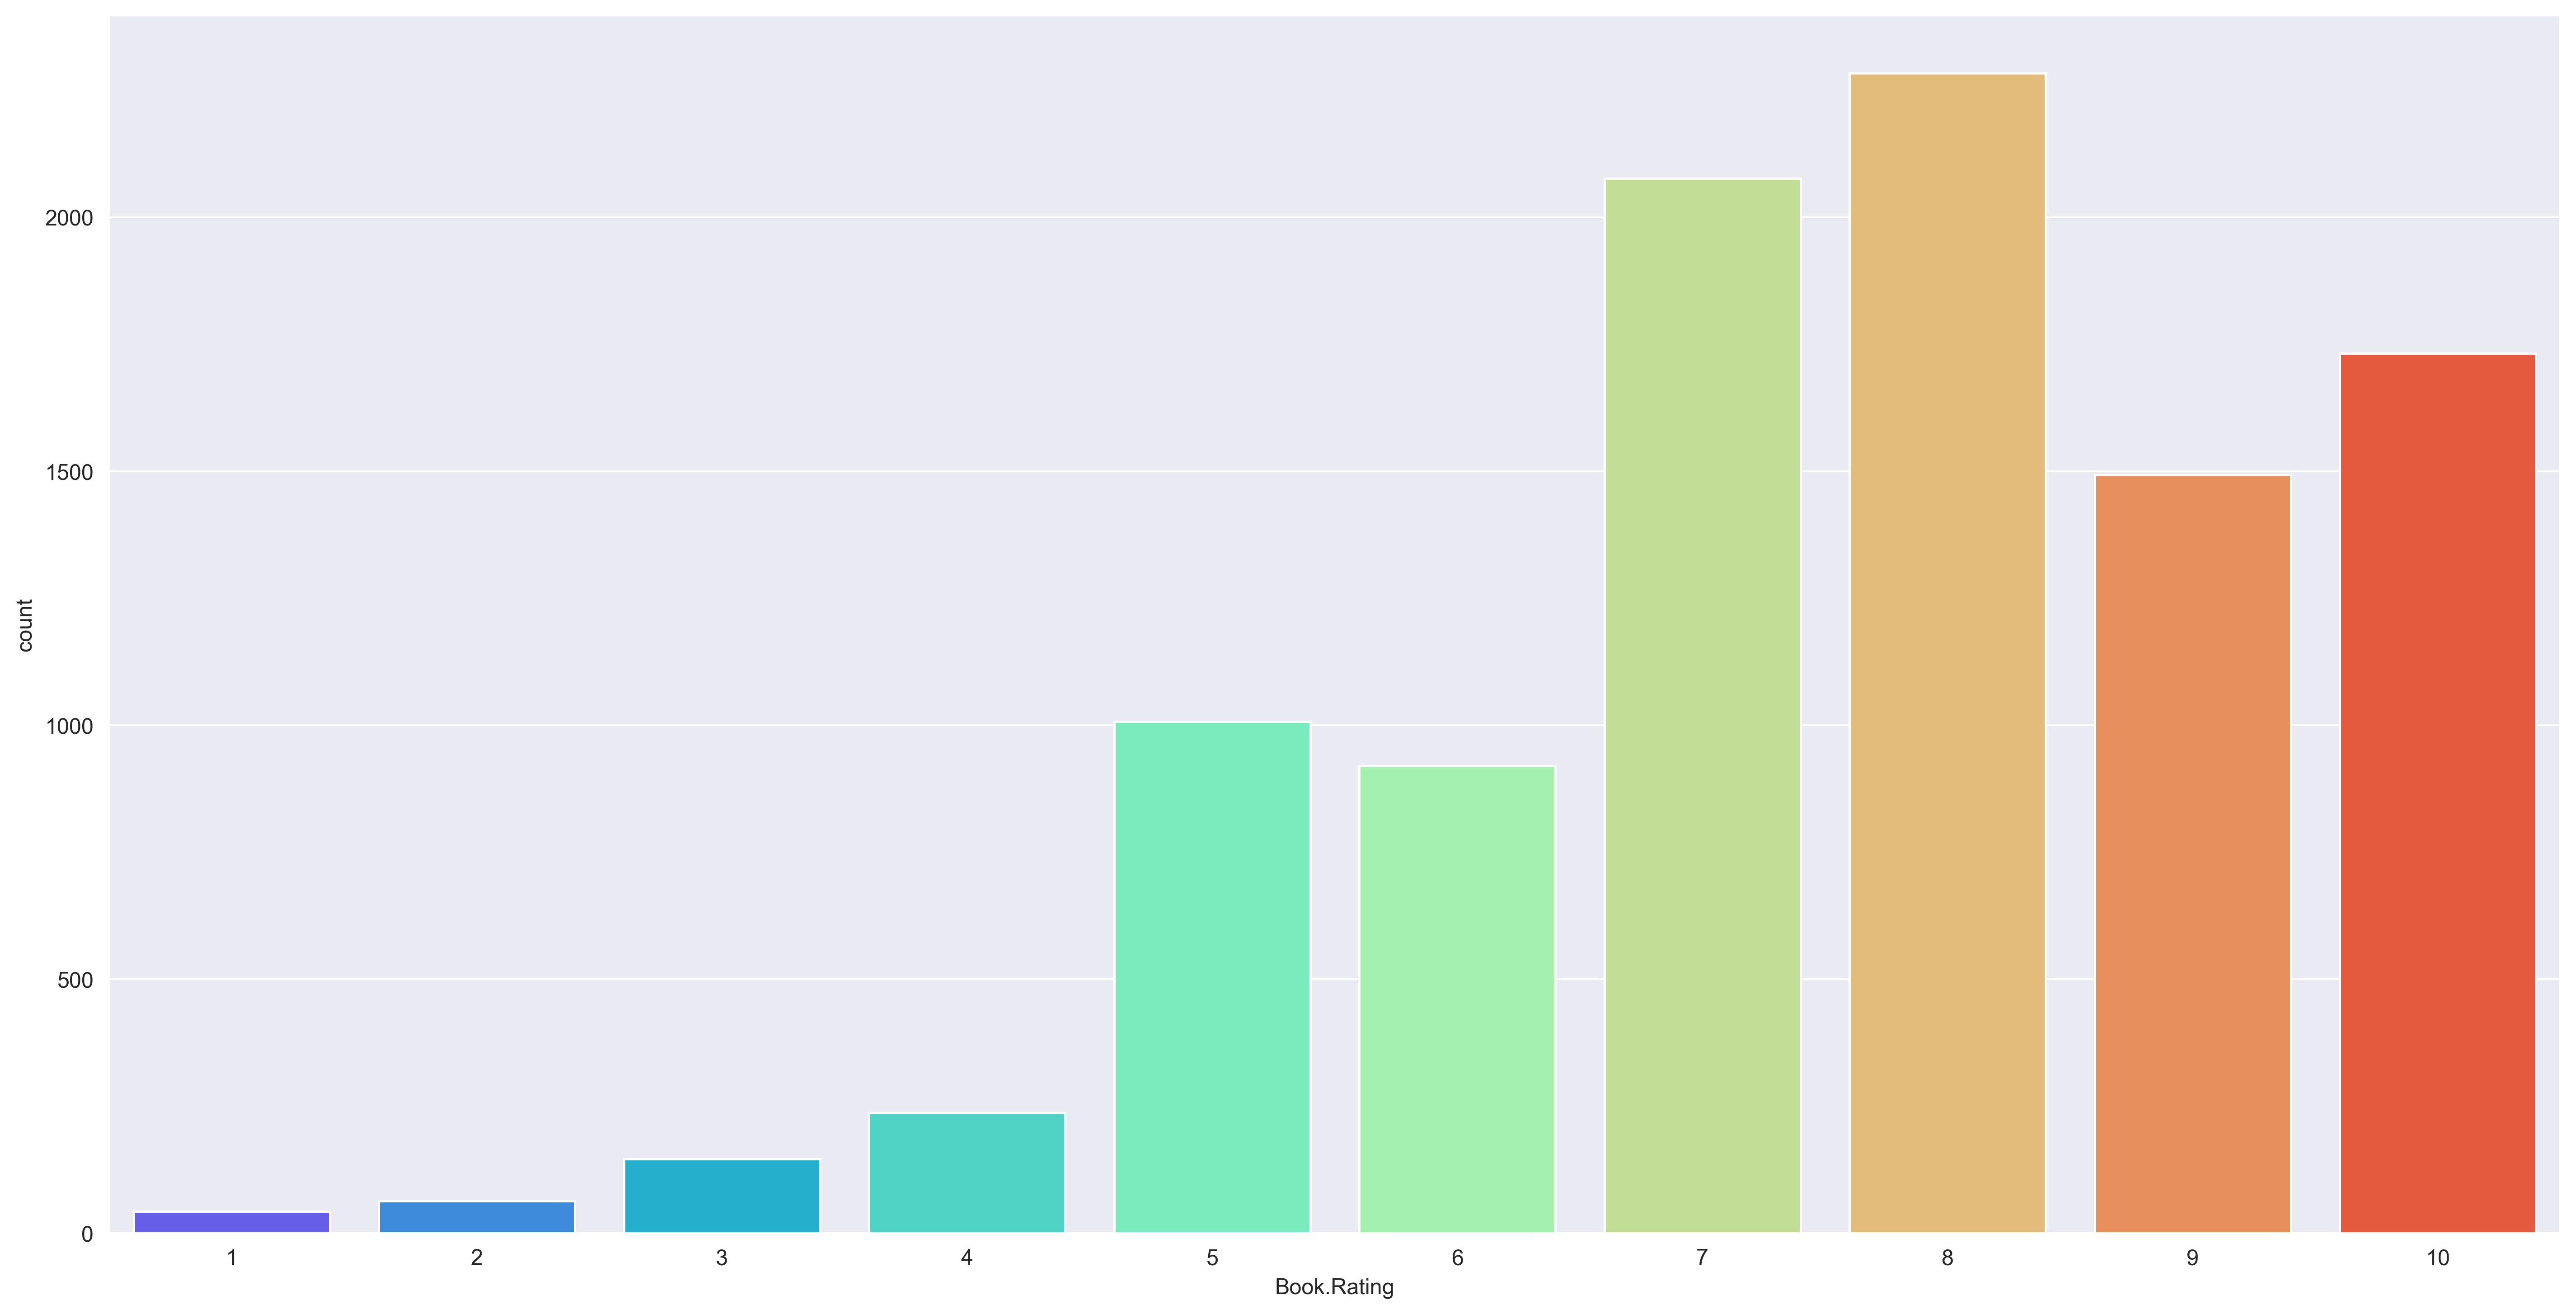

In [23]:
sns.countplot(bk['Book.Rating'], palette = 'rainbow')

#### Ploting Pietplot

Text(0.5, 1.0, '% of the top 10 best-selling novels')

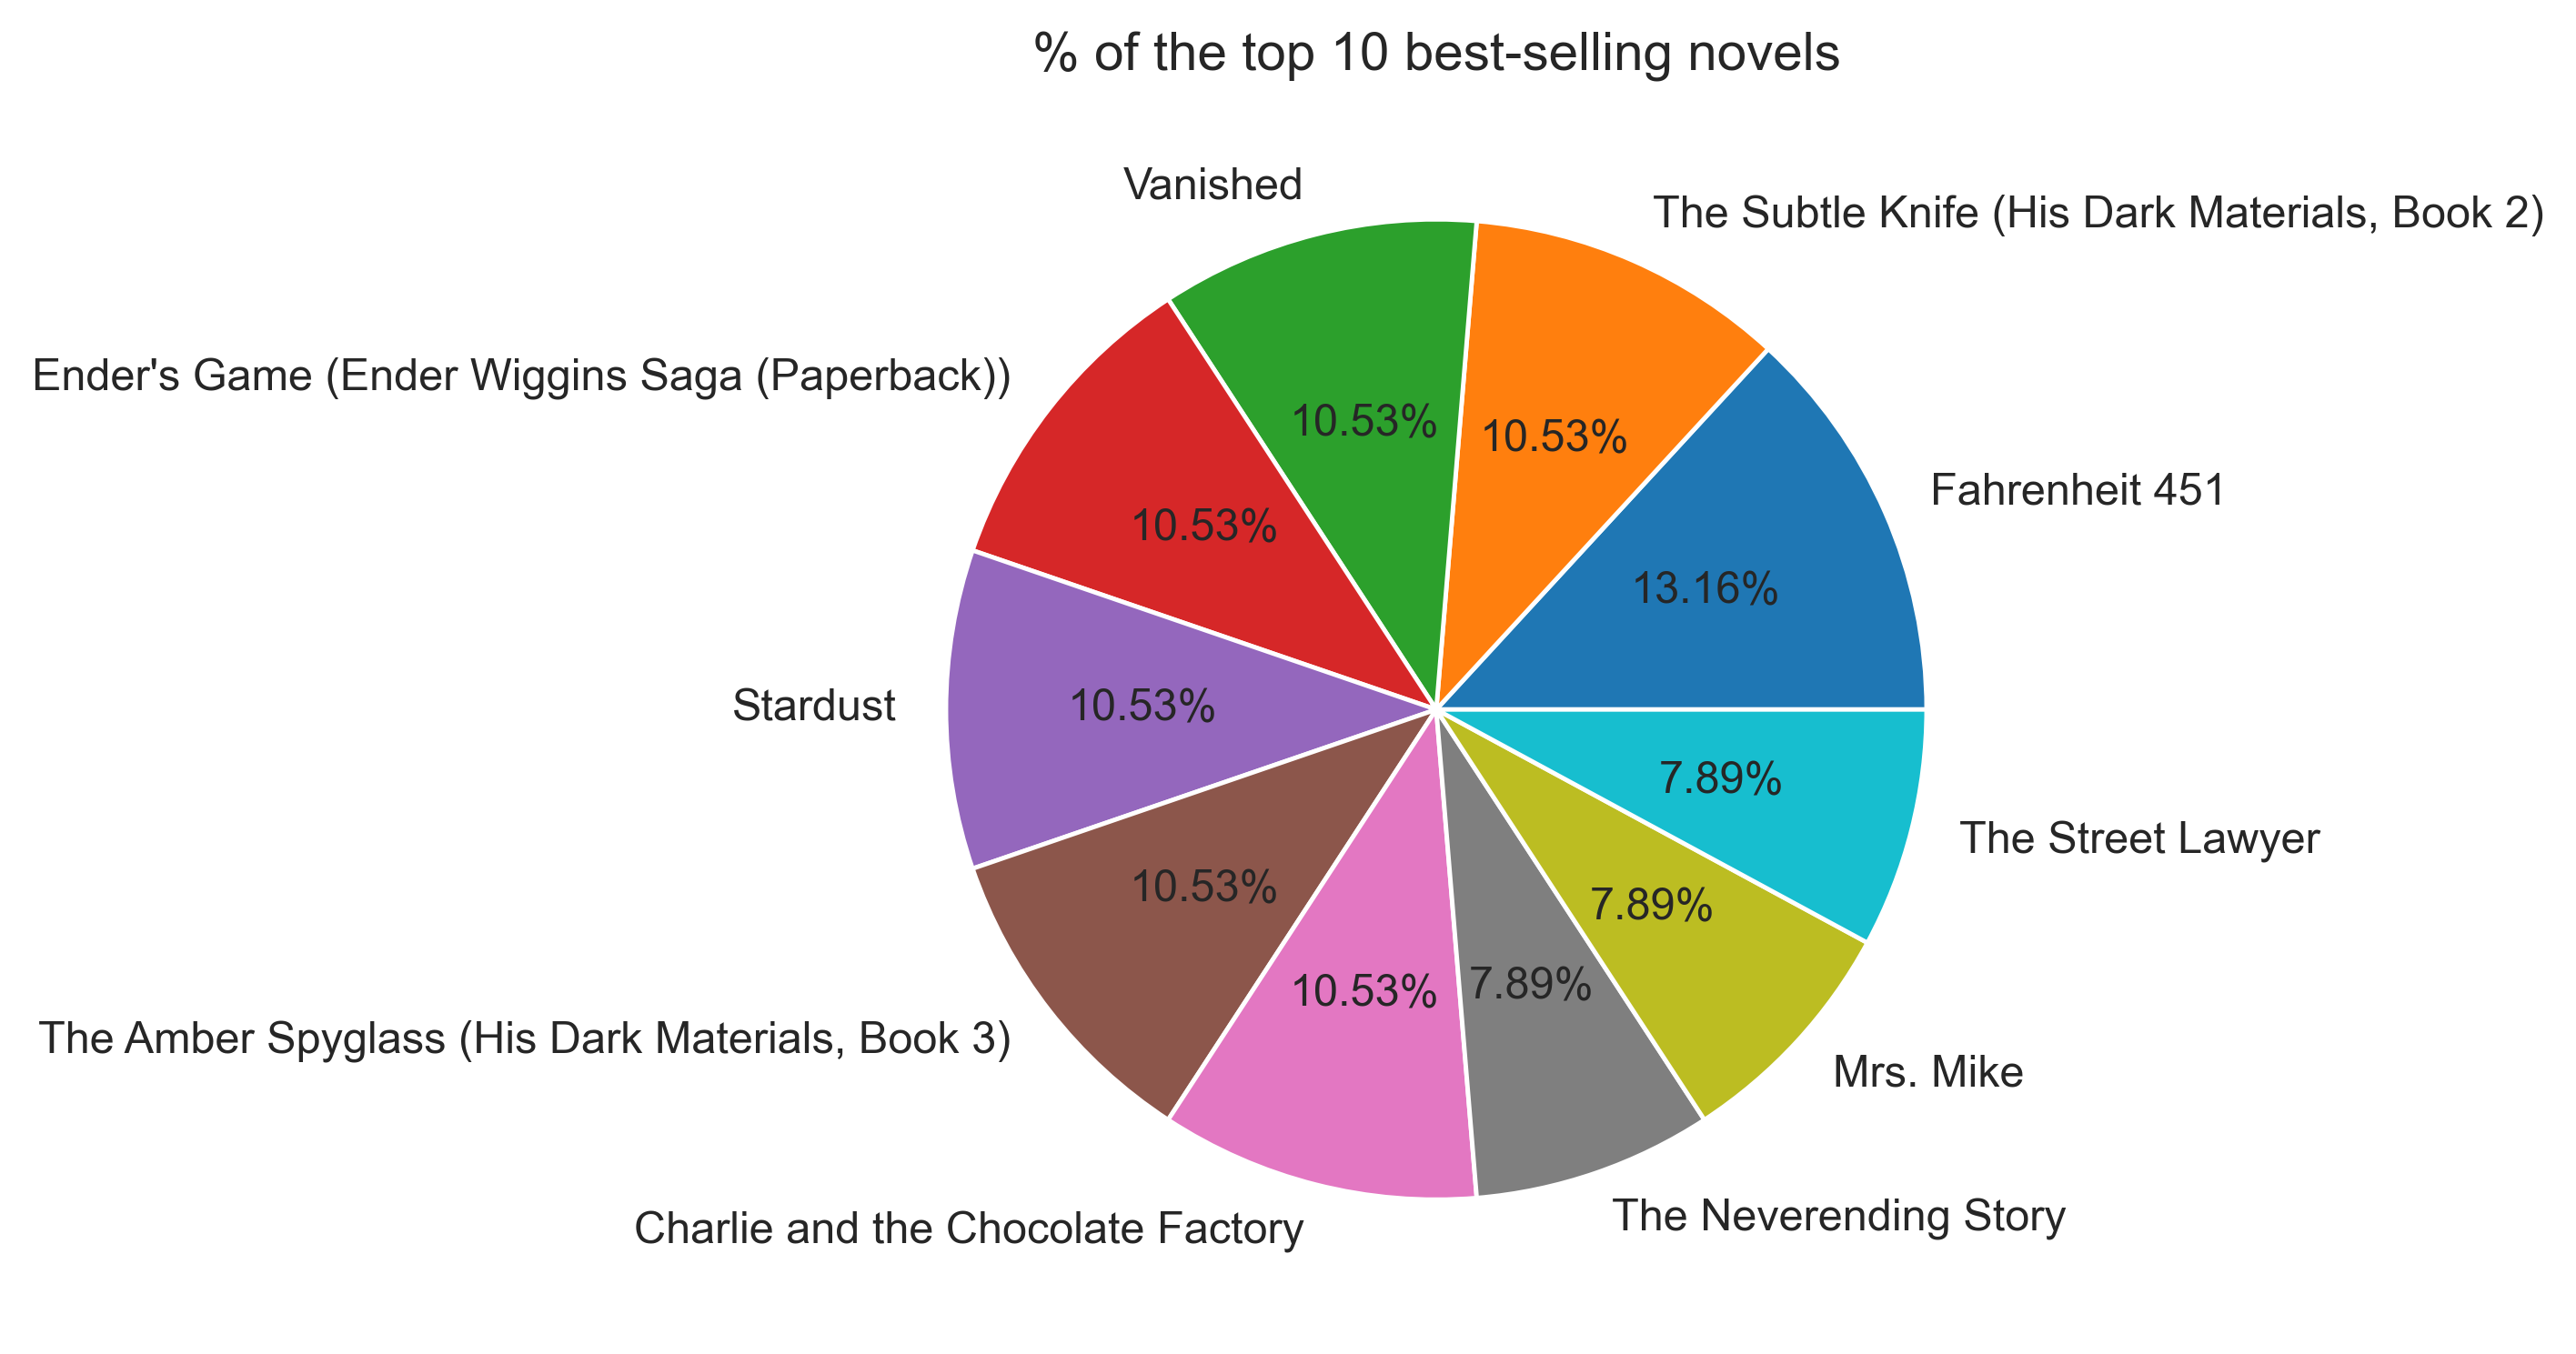

In [62]:
plt.pie(count['Count'], labels = count['Book'], autopct = '%.2f%%')
plt.title('% of the top 10 best-selling novels')

## Preparing Model From The Dataset

### Creating Model With User to User

In [49]:
user_book_bk = bk.pivot_table(index='User.ID', columns='Book.Title', values='Book.Rating')
user_book_bk.fillna(0,inplace=True)

user_book_bk

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [59]:
similarity = 1 - pairwise_distances(user_book_bk,metric='cosine')
np.fill_diagonal(similarity,0)

similarity = pd.DataFrame(similarity)
similarity.index = np.sort(bk['User.ID'].unique())
similarity.columns = np.sort(bk['User.ID'].unique())

similarity

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
similarity.idxmax()

8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [71]:
bk[ (bk['User.ID'] == 8) | (bk['User.ID'] == 14) ]

,User.ID,Book.Title,Book.Rating
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7
2409,14,COPS,5
2410,14,A Cold Heart: An Alex Delaware Novel,5
2411,14,Dead Sleep,6


### Creating Model With Product to Product

In [75]:
product_book_bk = bk.pivot_table(index='Book.Title', columns='User.ID', values='Book.Rating')
product_book_bk.fillna(0,inplace=True)

product_book_bk

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book.Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [84]:
similarity_product = 1 - pairwise_distances(product_book_bk,metric='cosine')
np.fill_diagonal(similarity_product,0)

similarity_product = pd.DataFrame(similarity_product)
similarity_product.index = np.sort(bk['Book.Title'].unique())
similarity_product.columns = np.sort(bk['Book.Title'].unique())

similarity_product

,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
"Jason, Madison &amp",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stardust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
similarity_product.idxmax()

 Jason, Madison &amp                                                               Other Stories;Merril;1985;McClelland &amp
 Other Stories;Merril;1985;McClelland &amp                                                               Jason, Madison &amp
 Repairing PC Drives &amp                                                                                Jason, Madison &amp
'48                                                                        Angry Men, Passive Men: Understanding the Root...
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities                                  A Child's Night Dream
                                                                                                 ...                        
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character                                          Angry Women
\Well, there's your problem\: Cartoons                                           A Blip in the Continuum (Macintosh Version)
